In [1]:
import os
import datetime

import matplotlib.pyplot as plt

from djia_stock_prediction import Dataset
from djia_stock_prediction import TradingDaysHelper

from djia_stock_prediction import str_to_datetime

from djia_stock_prediction import StockForecasterModel
from djia_stock_prediction import LongShortTermMemoryStockForecaster

/usr/local/lib/python3.5/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
Using TensorFlow backend.


In [2]:
# Loading the dataset
ds = Dataset.loadDatasetFromFile(os.path.join('data', 'djia_20140324-20190329.pkl'))

In [3]:
ticker_symbol = 'BA'

In [4]:
lstm_model = LongShortTermMemoryStockForecaster(ticker_symbol)
lstm_model.train(ds, end_date=str_to_datetime('2018-03-31'))
lstm_model_file = lstm_model.saveToFile(os.path.join('example', ticker_symbol + '_LSTM_ffv.pkl'))

Epoch 1/2
 - 243s - loss: 0.0019
Epoch 2/2
 - 242s - loss: 8.6910e-04


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


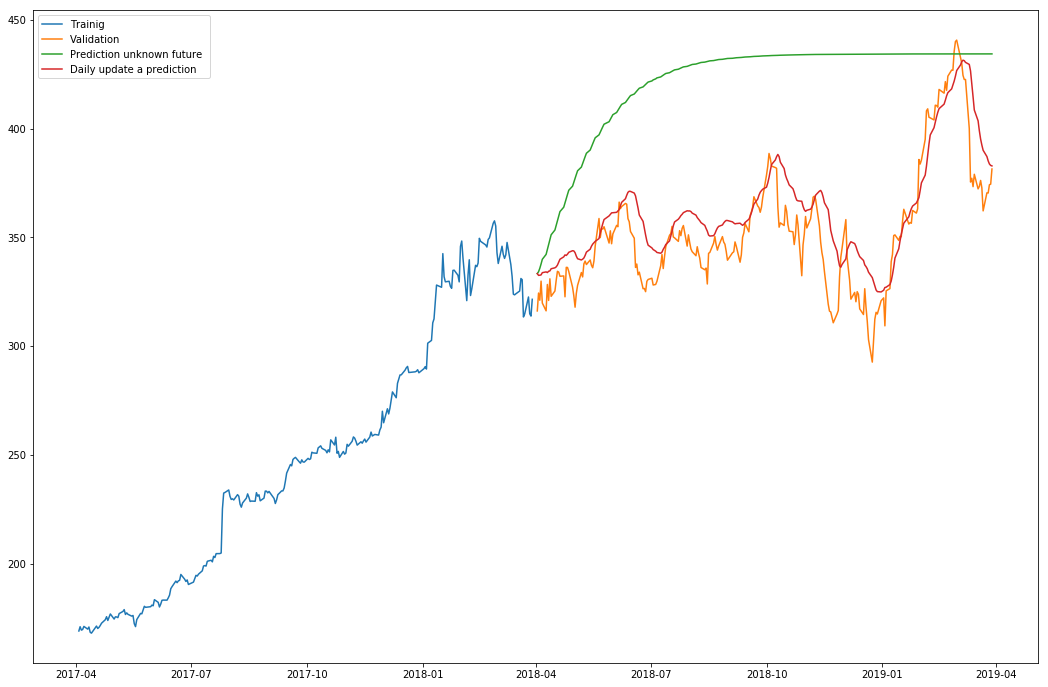

In [5]:
lstm_model = StockForecasterModel.loadFromFile(os.path.join('example', ticker_symbol + '_LSTM_ffv.pkl'))

part_traing_df = ds.getDataframe(ticker_symbol=ticker_symbol, 
                                 from_date=str_to_datetime('2017-04-01'),
                                 to_date=str_to_datetime('2018-03-31'));

validation_df = ds.getDataframe(ticker_symbol=ticker_symbol, 
                                from_date=str_to_datetime('2018-04-01'),
                                to_date=str_to_datetime('2019-03-31'));

preds_unknown = lstm_model.predict(str_to_datetime('2018-04-01'),
                                   to_date=str_to_datetime('2019-03-31'),
                                   base_dataset=None)

preds_updated = lstm_model.predict(str_to_datetime('2018-04-01'),
                                   to_date=str_to_datetime('2019-03-31'),
                                   base_dataset=ds)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(1, 1, 1)

ax.plot(part_traing_df.date, part_traing_df.close, label='Trainig')
ax.plot(validation_df.date, validation_df.close, label='Validation')
ax.plot(preds_unknown.date, preds_unknown.predicted_price, label='Prediction unknown future ')
ax.plot(preds_updated.date, preds_updated.predicted_price, label='Daily update a prediction')
ax.legend()

plt.savefig(os.path.join('figures', 'free-form-visualization.png'))
plt.show()